<a href="https://colab.research.google.com/github/plajuan/ML_Study/blob/main/exercicio_resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício resolvido

## Enunciado

Neste exercício, pretendemos prever se um dado passageiro do Titanic sobreviveu ou não. Para tal, vamos ter em consideração diversas características destes passageiros, tais como a classe em que viajavam, a sua idade e o seu género sexual.

## Dados

* Número de observações = 756
* Número de variáveis independentes = 4
 1. PClass = classe em que o passageiro viajava
 1. Age = idade do passageiro (anos)
 1. Sex = género sexual do passageiro (1 se feminino, 0 se masculino)
* Número de variáveis dependentes = 1
 1. Survived = diz-nos se um passageiro sobreviveu (1) ou não (0)


Dados disponíveis em: https://raw.githubusercontent.com/pmarcelino/datasets/master/titanic_fostwom.csv

**Nota:** A definição de variáveis dependentes e independentes tem apenas a ver com o enunciado do exercício. Se o enunciado exercício pedisse, por exemplo, para prever a idade com base nas restantes variáveis, a variável dependente seria 'Age' e não 'Survived'.

## Exemplo

A primeira observação do conjunto de dados que vamos ver na Resolução - primeira linha da tabela que surge após fazermos `df` - refere-se a um passageiro que:

* Viajava na primeira classe
* Tinha 29 anos
* Era do sexo feminino
* Sobreviveu ao acidente

In [ ]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Nota:** Se, ao importares as bibliotecas, surgir um `FutureWarning`, não te preocupes. Essa mensagem serve apenas para alertar que estão em curso algumas alterações na biblioteca em relação à qual a mensagem se refere.

# Resolução

1. Preparar dados
1. Explorar dados
1. Treinar modelo
1. Avaliar modelo

## 1. Preparar dados

1. Importar dados
1. Eliminar observações com dados em falta

In [ ]:
# Importar dados
url = 'https://raw.githubusercontent.com/pmarcelino/datasets/master/titanic_fostwom.csv'
df = pd.read_csv(url)
df

,PClass,Age,Sex,Survived
0,1.0,29.0,1.0,1
1,1.0,2.0,0.0,0
2,1.0,NaN,0.0,0
3,NaN,25.0,1.0,0
4,1.0,1.0,0.0,1
...,...,...,...,...
751,3.0,27.0,0.0,0
752,3.0,26.0,0.0,0
753,NaN,22.0,0.0,0
754,3.0,24.0,0.0,0


* Importação bem-sucedida
* Confirma-se as 756 observações (`756 rows`)
* Confirma-se as 3 + 1 variáveis (`4 columns`)
* Há dados em falta em algumas observações (NaN)

In [ ]:
# Eliminar observações com dados em falta
df = df.dropna()
df

,PClass,Age,Sex,Survived
0,1.0,29.0,1.0,1
1,1.0,2.0,0.0,0
4,1.0,1.0,0.0,1
5,1.0,47.0,0.0,1
6,1.0,63.0,1.0,1
...,...,...,...,...
749,3.0,27.0,0.0,0
751,3.0,27.0,0.0,0
752,3.0,26.0,0.0,0
754,3.0,24.0,0.0,0


* Número de observações disponíveis reduz-se para 728 (`728 rows`)
* Caso a operação tenha sido bem realizada, agora só temos observações completas (sem dados em falta)

**Nota:** Apesar de termos `728 rows`, o índice vai até 755. Isto acontece porque os índices das linhas não se alteram quando as observações são eliminadas. Por este motivo, a linha com o índice 755 manteve-se (não tinha dados em falta) e, por exemplo, a linha com o índice 2 desapareceu (tinha dados em falta).

In [ ]:
# Verificar se há dados em falta
df.isnull().sum()

PClass      0
Age         0
Sex         0
Survived    0
dtype: int64

* Não há variáveis com observações que tenham dados em falta
* Confirma-se que agora só temos observações completas (conjunto de dados completo)

## 2. Explorar dados

1. Visualizar relação entre a idade dos passageiros e se sobreviveram ou não, através de um diagrama de extremos e quartis

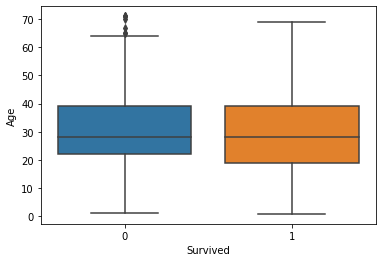

In [ ]:
# Visualizar relação entre a idade dos passageiros e se sobreviveram ou não
sns.boxplot(x='Survived', y='Age', data=df)

* A idade não parece influenciar a sobrevivência
* Esta informação é importante porque dá-nos pistas sobre as relações entre as variáveis, ajudando-nos a compreender os dados

## 3. Treinar modelo

1. Preparar os dados para aplicar o algoritmo
 * Definir variáveis independentes e dependentes
 * Dividir dados em conjunto de dados de treino e de teste
1. Definir o algortimo a utilizar para treinar o modelo
1. Treinar o modelo com o algoritmo definido

In [ ]:
# Definir variáveis independentes e dependente
X = df.drop('Survived', axis=1)
y = df['Survived']

* Para treinar o modelo, é necessário que todas as variáveis independentes sejam numéricas
* Neste caso, como todas as variáveis independentes são numéricas, basta guardar toda a tabela em `X`, exceto a coluna 'Survived' (daí termos usado a função `drop`)


In [ ]:
# Dividir dados em conjunto de dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

* Esta função divide, aleatoriamente, os dados entre o conjunto de dados de treino e de teste. Por predefinição, a função `train_test_split` coloca 75% dos dados do conjunto de dados original no conjunto de dados de treino e os restantes 25% dos dados no conjunto de dados de teste.
* Para que esta divisão seja sempre igual, definimos o argumento `random_state`.
* Assim, se executarem um código exatamente igual ao nosso, obtêm os mesmos resultados.
* Utilizámos o número 42, mas poderíamos ter utilizado outro número qualquer.

In [ ]:
# Definir algoritmo do modelo
model = RandomForestClassifier(random_state=7)

* Definimos o `random_state` pelas razões anteriormente referidas

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

## 4. Avaliar modelo

1. Fazer previsões
1. Avaliar o modelo com base nas previsões efetuadas

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)

In [ ]:
# Avaliar modelo usando a taxa de acerto como medida
accuracy_score(y_test, y_pred)

0.7802197802197802

* O nosso modelo tem uma taxa de acerto (`accuracy_score`) de, aproximadamente, 78%